In [ ]:
! pip install git+https://github.com/openai/CLIP.git

In [ ]:
import torch
import clip
from PIL import Image

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 88.8MiB/s]


In [ ]:
image_path = "/content/drive/MyDrive/Coding/Project/TinyCLIP/img/Cat.png"
item = ["a snake", "a dog", "a cat"]

In [ ]:
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
text = clip.tokenize(item).to(device)

In [ ]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = 100*logits_per_image.softmax(dim=-1).cpu().numpy()

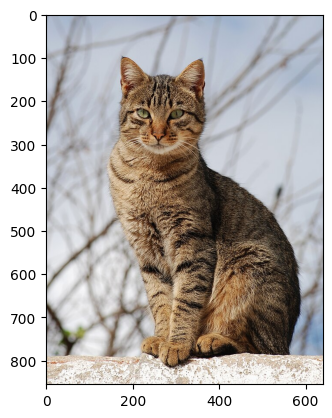

In [ ]:
import matplotlib.pyplot as plt

image = Image.open(image_path)
plt.imshow(image)

plt.show()

In [ ]:
for i in range(len(item)):
    print(item[i], ':', probs[0][i], '%')

a snake : 0.020809887 %
a dog : 0.23789231 %
a cat : 99.741295 %
